## Plots from X-ray absorption calculations using ORCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [9]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

--------------

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

##### System of study: G$_2$YG$_n$PG$_{11-n}$ (n=0..9)

### Header test

In [394]:
resa_mocore_G9FGY_raw = pd.read_csv('resA_MOcore_G9FGY.csv', delimiter=',', index_col='num-1')
resa_mocore_G7FG3Y_raw = pd.read_csv('resA_MOcore_G7FG3Y.csv', delimiter=',', index_col='num-1')
resa_mocore_G5FG5Y_raw = pd.read_csv('resA_MOcore_G5FG5Y.csv', delimiter=',', index_col='num-1')
resa_mocore_G3FG7Y_raw = pd.read_csv('resA_MOcore_G3FG7Y.csv', delimiter=',', index_col='num-1')
resa_mocore_GFG9Y_raw = pd.read_csv('resA_MOcore_GFG9Y.csv', delimiter=',', index_col='num-1')
resa_mocore_G9FGY_raw#.head()

,sym,lvl,26,27,28,29,30,31,32,33,...,54,55,56,57,58,59,60,61,62,63
num-1,,,,,,,,,,,,,,,,,,,,,
65,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,C,s,0.0,0.0,0.0,0.0,0.0,0.0,99.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.2,0.0,95.1,0.2,0.0,0.0
71,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.1,0.0,0.0,0.0,2.1,96.3,0.0
72,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,95.5,1.5,0.0,0.0,1.1,1.5,0.0
73,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.8,1.2,0.0,0.5,94.4,1.7,0.0
74,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.2,92.6,0.0,3.9,1.9,0.0,0.0


In [395]:
resb_movirt_G9FGY_raw = pd.read_csv('resB_MOcore_G9FGY.csv', delimiter=',', index_col='num-1')
resb_movirt_G7FG3Y_raw = pd.read_csv('resB_MOcore_G7FG3Y.csv', delimiter=',', index_col='num-1')
resb_movirt_G5FG5Y_raw = pd.read_csv('resB_MOcore_G5FG5Y.csv', delimiter=',', index_col='num-1')
resb_movirt_G3FG7Y_raw = pd.read_csv('resB_MOcore_G3FG7Y.csv', delimiter=',', index_col='num-1')
resb_movirt_GFG9Y_raw = pd.read_csv('resB_MOcore_GFG9Y.csv', delimiter=',', index_col='num-1')
resb_movirt_G7FG3Y_raw#.head()

,sym,lvl,237,238,239,240,241,243,245,246,...,249,250,251,252,253,254,255,257,258,261
num-1,,,,,,,,,,,,,,,,,,,,,
91,atom,lvlMO,0.8,0.3,0.0,0.0,1.7,0.1,0.2,2.2,...,0.6,0.5,0.9,0.0,0.2,0.0,0.1,0.2,0.9,0.7
92,atom,lvlMO,1.5,2.4,0.0,0.0,2.7,0.1,0.8,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
93,atom,lvlMO,2.8,9.6,0.3,0.1,19.4,0.2,7.7,1.7,...,0.2,0.6,1.2,0.0,0.0,0.0,0.2,0.1,0.3,0.4
94,atom,lvlMO,1.5,4.0,0.2,0.0,8.9,0.0,3.8,0.7,...,0.2,0.3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,atom,lvlMO,0.5,2.3,0.0,0.0,7.6,0.3,2.8,0.6,...,0.1,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.1
96,atom,lvlMO,0.5,1.9,0.0,0.0,3.0,0.1,0.5,0.4,...,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.4
97,atom,lvlMO,1.6,17.1,0.2,0.0,0.4,0.2,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0
98,atom,lvlMO,24.2,2.1,0.0,0.0,0.8,0.1,1.1,0.1,...,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.6
99,atom,lvlMO,14.5,12.3,0.2,0.0,0.4,0.3,0.1,0.2,...,0.5,0.3,0.4,0.0,0.1,0.0,0.1,0.0,0.0,0.0


In [396]:
core_virt_mo_G9FGY_raw = pd.read_csv('corevirtMO_matrix_G9FGY.csv', delimiter=',', index_col='virt\core')
core_virt_mo_G7FG3Y_raw = pd.read_csv('corevirtMO_matrix_G7FG3Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_G5FG5Y_raw = pd.read_csv('corevirtMO_matrix_G5FG5Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_G3FG7Y_raw = pd.read_csv('corevirtMO_matrix_G3FG7Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_GFG9Y_raw = pd.read_csv('corevirtMO_matrix_GFG9Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_G9FGY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0,0,0,0,0,0,0,0,0,2,...,9,8,9,4,6,3,6,5,6,7
238,0,0,0,0,0,0,0,0,0,1,...,10,10,10,10,6,4,4,9,11,7
239,0,0,0,0,0,0,0,0,0,2,...,10,13,14,8,8,4,4,10,9,7
240,0,0,0,0,0,0,0,0,0,2,...,7,10,6,6,6,6,11,4,8,4
241,0,0,0,0,0,0,0,0,0,2,...,9,8,8,12,6,5,7,8,7,7


In [397]:
core_virt_mo_tspb_G9FGY_raw = pd.read_csv('corevirtMO_matrix_tspb_G9FGY.csv', delimiter=',', index_col='virt\core')
core_virt_mo_tspb_G7FG3Y_raw = pd.read_csv('corevirtMO_matrix_tspb_G7FG3Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_tspb_G5FG5Y_raw = pd.read_csv('corevirtMO_matrix_tspb_G5FG5Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_tspb_G3FG7Y_raw = pd.read_csv('corevirtMO_matrix_tspb_G3FG7Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_tspb_GFG9Y_raw = pd.read_csv('corevirtMO_matrix_tspb_GFG9Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_tspb_G9FGY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01140,...,0.021956,0.012337,0.053033,0.138275,0.078583,0.191033,0.046917,0.172720,0.016067,0.072029
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01140,...,0.004620,0.015470,0.024890,0.030930,0.030967,0.098900,0.016125,0.009422,0.016673,0.005286
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02595,...,0.005900,0.013400,0.002921,0.062150,0.032063,0.118550,0.017750,0.010440,0.032522,0.010600
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49505,...,0.057029,0.009080,0.035900,0.103750,0.054617,0.027817,0.049900,0.190825,0.003550,0.138075
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38055,...,0.005489,0.045900,0.046262,0.005475,0.024617,0.078460,0.013500,0.013612,0.015214,0.065643


In [531]:
core_virt_mo_fosce_G9FGY_raw = pd.read_csv('corevirt_fosce_G9FGY.csv', delimiter=',', index_col='virt\core')
core_virt_mo_fosce_G7FG3Y_raw = pd.read_csv('corevirt_fosce_G7FG3Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_fosce_G5FG5Y_raw = pd.read_csv('corevirt_fosce_G5FG5Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_fosce_G3FG7Y_raw = pd.read_csv('corevirt_fosce_G3FG7Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_fosce_GFG9Y_raw = pd.read_csv('corevirt_fosce_GFG9Y.csv', delimiter=',', index_col='virt\core')

core_virt_mo_foscv_G9FGY_raw = pd.read_csv('corevirt_foscv_G9FGY.csv', delimiter=',', index_col='virt\core')
core_virt_mo_foscv_G7FG3Y_raw = pd.read_csv('corevirt_foscv_G7FG3Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_foscv_G5FG5Y_raw = pd.read_csv('corevirt_foscv_G5FG5Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_foscv_G3FG7Y_raw = pd.read_csv('corevirt_foscv_G3FG7Y.csv', delimiter=',', index_col='virt\core')
core_virt_mo_foscv_GFG9Y_raw = pd.read_csv('corevirt_foscv_GFG9Y.csv', delimiter=',', index_col='virt\core')

core_virt_mo_foscv_G9FGY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,...,0.000825,0.000171,0.000510,0.000022,0.000004,0.006993,0.000002,0.000244,0.000024,0.003843
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000044,...,0.000222,0.000897,0.000010,0.000027,0.002927,0.000442,0.000014,0.000599,0.000549,0.000156
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000104,...,0.000213,0.000833,0.000195,0.000057,0.002949,0.000286,0.000016,0.000654,0.001198,0.000294
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002041,...,0.000469,0.000671,0.001928,0.004232,0.002523,0.001252,0.003801,0.007829,0.000202,0.000156
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001534,...,0.000380,0.003433,0.002958,0.000179,0.000042,0.004013,0.000931,0.000774,0.000264,0.001371


In [398]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [399]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [400]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [401]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][2:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if item in dff.T.axes[1][2:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

In [393]:
#atoms_a = [i for i in range(64, 83, 1)] 
resa_mocore_G9FGY = nonzero_mo_matrix(resa_mocore_G9FGY_raw) #64 83 range of atoms from residue A (G9FGY)
resa_mocore_G7FG3Y = nonzero_mo_matrix(resa_mocore_G7FG3Y_raw) #50 - 69 range of atoms from residue A (G7FG3Y)
resa_mocore_G5FG5Y = nonzero_mo_matrix(resa_mocore_G5FG5Y_raw) #36 - 55range of atoms from residue A (G5FG5Y)
resa_mocore_G3FG7Y = nonzero_mo_matrix(resa_mocore_G3FG7Y_raw) #22 - 41 range of atoms from residue A (G3FG7Y)
resa_mocore_GFG9Y = nonzero_mo_matrix(resa_mocore_GFG9Y_raw) #8 - 27 range of atoms from residue A (GFG9Y)
#resa_mocore_G9FGY

In [452]:
resb_movirt_G9FGY = nonzero_mo_matrix(resb_movirt_G9FGY_raw)
resb_movirt_G7FG3Y = nonzero_mo_matrix(resb_movirt_G7FG3Y_raw)
resb_movirt_G5FG5Y = nonzero_mo_matrix(resb_movirt_G5FG5Y_raw)
resb_movirt_G3FG7Y = nonzero_mo_matrix(resb_movirt_G3FG7Y_raw)
resb_movirt_GFG9Y = nonzero_mo_matrix(resb_movirt_GFG9Y_raw)

#for counting transitions in MO having greater than 50% of Loewdin population contribution in resB
pop = 0.67
resb_movirt_G9FGY_pop = crop_by_loewdin_p(resb_movirt_G9FGY_raw,pop)
resb_movirt_G7FG3Y_pop = crop_by_loewdin_p(resb_movirt_G7FG3Y_raw,pop)
resb_movirt_G5FG5Y_pop = crop_by_loewdin_p(resb_movirt_G5FG5Y_raw,pop)
resb_movirt_G3FG7Y_pop = crop_by_loewdin_p(resb_movirt_G3FG7Y_raw,pop)
resb_movirt_GFG9Y_pop = crop_by_loewdin_p(resb_movirt_GFG9Y_raw,pop)

#resb_movirt_G9FGY

In [403]:
#uncomment to check
#resa_mocore_G5FG5Y.head()
#resb_movirt_G5FG5Y.head()
#resb_movirt_G5FG5Y_raw.head()
core_virt_mo_G5FG5Y_raw.head()

,26,27,28,29,30,31,32,33,34,35,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0,0,0,0,0,0,0,0,0,0,...,5,6,7,5,0,0,4,0,0,0
238,1,0,0,0,0,0,0,0,0,0,...,9,4,6,5,2,3,4,3,2,2
239,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,7,5,1,6,7,4
240,1,0,0,0,0,0,0,0,0,0,...,8,7,8,4,2,3,5,3,2,2
241,0,0,0,0,0,0,0,1,0,1,...,1,1,1,1,6,6,1,9,5,6


In [342]:
#[int(i) for i in resb_movirt_G5FG5Y.axes[1][2:].tolist()]

In [453]:
#core_virt_mo_GFG9Y['29'] #to show column '29'
#core_virt_mo_GFG9Y.loc[252] #to show row '252'
core_virt_mo_G9FGY = cropping_matrix(core_virt_mo_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY)
core_virt_mo_G7FG3Y = cropping_matrix(core_virt_mo_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y)
core_virt_mo_G5FG5Y = cropping_matrix(core_virt_mo_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y)
core_virt_mo_G3FG7Y = cropping_matrix(core_virt_mo_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y)
core_virt_mo_GFG9Y = cropping_matrix(core_virt_mo_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y)

#core_virt_mo_G9FGY
core_virt_mo_G9FGY_pop = cropping_matrix(core_virt_mo_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY_pop)
core_virt_mo_G7FG3Y_pop = cropping_matrix(core_virt_mo_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y_pop)
core_virt_mo_G5FG5Y_pop = cropping_matrix(core_virt_mo_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y_pop)
core_virt_mo_G3FG7Y_pop = cropping_matrix(core_virt_mo_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y_pop)
core_virt_mo_GFG9Y_pop = cropping_matrix(core_virt_mo_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y_pop)


In [479]:
core_virt_mo_tspb_G9FGY = cropping_matrix(core_virt_mo_tspb_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY)
core_virt_mo_tspb_G7FG3Y = cropping_matrix(core_virt_mo_tspb_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y)
core_virt_mo_tspb_G5FG5Y = cropping_matrix(core_virt_mo_tspb_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y)
core_virt_mo_tspb_G3FG7Y = cropping_matrix(core_virt_mo_tspb_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y)
core_virt_mo_tspb_GFG9Y = cropping_matrix(core_virt_mo_tspb_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y)
#core_virt_mo_GFG9Y

core_virt_mo_tspb_G9FGY_pop = cropping_matrix(core_virt_mo_tspb_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY_pop)
core_virt_mo_tspb_G7FG3Y_pop = cropping_matrix(core_virt_mo_tspb_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y_pop)
core_virt_mo_tspb_G5FG5Y_pop = cropping_matrix(core_virt_mo_tspb_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y_pop)
core_virt_mo_tspb_G3FG7Y_pop = cropping_matrix(core_virt_mo_tspb_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y_pop)
core_virt_mo_tspb_GFG9Y_pop = cropping_matrix(core_virt_mo_tspb_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y_pop)

In [533]:
core_virt_mo_fosce_G9FGY = cropping_matrix(core_virt_mo_fosce_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY)
core_virt_mo_fosce_G7FG3Y = cropping_matrix(core_virt_mo_fosce_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y)
core_virt_mo_fosce_G5FG5Y = cropping_matrix(core_virt_mo_fosce_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y)
core_virt_mo_fosce_G3FG7Y = cropping_matrix(core_virt_mo_fosce_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y)
core_virt_mo_fosce_GFG9Y = cropping_matrix(core_virt_mo_fosce_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y)

core_virt_mo_fosce_G9FGY_pop = cropping_matrix(core_virt_mo_fosce_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY_pop)
core_virt_mo_fosce_G7FG3Y_pop = cropping_matrix(core_virt_mo_fosce_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y_pop)
core_virt_mo_fosce_G5FG5Y_pop = cropping_matrix(core_virt_mo_fosce_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y_pop)
core_virt_mo_fosce_G3FG7Y_pop = cropping_matrix(core_virt_mo_fosce_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y_pop)
core_virt_mo_fosce_GFG9Y_pop = cropping_matrix(core_virt_mo_fosce_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y_pop)
#core_virt_mo_fosce_G9FGY.head()

core_virt_mo_foscv_G9FGY = cropping_matrix(core_virt_mo_foscv_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY)
core_virt_mo_foscv_G7FG3Y = cropping_matrix(core_virt_mo_foscv_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y)
core_virt_mo_foscv_G5FG5Y = cropping_matrix(core_virt_mo_foscv_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y)
core_virt_mo_foscv_G3FG7Y = cropping_matrix(core_virt_mo_foscv_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y)
core_virt_mo_foscv_GFG9Y = cropping_matrix(core_virt_mo_foscv_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y)

core_virt_mo_foscv_G9FGY_pop = cropping_matrix(core_virt_mo_foscv_G9FGY_raw, resa_mocore_G9FGY, resb_movirt_G9FGY_pop)
core_virt_mo_foscv_G7FG3Y_pop = cropping_matrix(core_virt_mo_foscv_G7FG3Y_raw, resa_mocore_G7FG3Y, resb_movirt_G7FG3Y_pop)
core_virt_mo_foscv_G5FG5Y_pop = cropping_matrix(core_virt_mo_foscv_G5FG5Y_raw, resa_mocore_G5FG5Y, resb_movirt_G5FG5Y_pop)
core_virt_mo_foscv_G3FG7Y_pop = cropping_matrix(core_virt_mo_foscv_G3FG7Y_raw, resa_mocore_G3FG7Y, resb_movirt_G3FG7Y_pop)
core_virt_mo_foscv_GFG9Y_pop = cropping_matrix(core_virt_mo_foscv_GFG9Y_raw, resa_mocore_GFG9Y, resb_movirt_GFG9Y_pop)
#core_virt_mo_foscv_G9FGY_pop.head()

In [526]:
#core_virt_mo_tspb_G3FG7Y_pop.head()

In [424]:
core_virt_mo_G9FGY.shape
#core_virt_mo_tspb_G9FGY.shape
#core_virt_mo_G9FGY

(21, 8)

In [454]:
core_virt_mo_G9FGY_pop.shape

(3, 8)

In [426]:
core_virt_mo_G7FG3Y.shape
#core_virt_mo_tspb_G7FG3Y.shape

(19, 9)

In [427]:
core_virt_mo_G5FG5Y.shape
#core_virt_mo_tspb_G5FG5Y.shape

(16, 9)

In [428]:
core_virt_mo_G3FG7Y.shape
#core_virt_mo_tspb_G3FG7Y.shape

(16, 9)

In [429]:
core_virt_mo_GFG9Y.shape
#core_virt_mo_tspb_GFG9Y.shape

(20, 9)

In [430]:
core_virt_mo_G9FGY_raw.sum().sum()

1559

In [431]:
core_virt_mo_G9FGY_raw.shape

(26, 35)

In [432]:
core_virt_mo_G7FG3Y_raw.sum().sum()

1175

In [433]:
core_virt_mo_G5FG5Y_raw.sum().sum()

1206

In [434]:
core_virt_mo_G3FG7Y_raw.sum().sum()

1218

In [436]:
core_virt_mo_GFG9Y_raw.sum().sum()

1423

Comparisson

In [437]:
core_virt_mo_G9FGY.sum().sum()/core_virt_mo_G9FGY_raw.sum().sum()

0.5522771007055804

In [438]:
core_virt_mo_G7FG3Y.sum().sum()/core_virt_mo_G7FG3Y_raw.sum().sum()

0.5880851063829787

In [439]:
core_virt_mo_G5FG5Y.sum().sum()/core_virt_mo_G5FG5Y_raw.sum().sum()

0.48175787728026537

In [534]:
core_virt_mo_G3FG7Y.sum().sum()/core_virt_mo_G3FG7Y_raw.sum().sum()

0.513136288998358

In [441]:
core_virt_mo_GFG9Y.sum().sum()/core_virt_mo_GFG9Y_raw.sum().sum()

0.4483485593815882

50% loewdin population

In [466]:
core_virt_mo_G9FGY_pop.sum().sum(), core_virt_mo_G9FGY.sum().sum()

(152, 861)

In [467]:
core_virt_mo_G7FG3Y_pop.sum().sum(), core_virt_mo_G7FG3Y.sum().sum()

(137, 691)

In [469]:
core_virt_mo_G5FG5Y_pop.sum().sum(), core_virt_mo_G5FG5Y.sum().sum()

(98, 581)

In [470]:
core_virt_mo_G3FG7Y_pop.sum().sum(), core_virt_mo_G3FG7Y.sum().sum()

(86, 625)

In [471]:
core_virt_mo_GFG9Y_pop.sum().sum(), core_virt_mo_GFG9Y.sum().sum()

(9, 638)

67% loewdin population - weighted fosc electronic dipole moment

In [535]:
core_virt_mo_fosce_G9FGY_pop.sum().sum(), core_virt_mo_fosce_G9FGY.sum().sum()

(0.03383399445, 0.091651643142)

In [536]:
core_virt_mo_fosce_G7FG3Y_pop.sum().sum(), core_virt_mo_fosce_G7FG3Y.sum().sum()

(0.04438726753000001, 0.1691764115875)

In [537]:
core_virt_mo_fosce_G5FG5Y_pop.sum().sum(), core_virt_mo_fosce_G5FG5Y.sum().sum()

(0.006232323400000001, 0.1245451627907)

In [538]:
core_virt_mo_fosce_G3FG7Y_pop.sum().sum(), core_virt_mo_fosce_G3FG7Y.sum().sum()

(0.003689181141, 0.1573194259684)

In [539]:
core_virt_mo_fosce_GFG9Y_pop.sum().sum(), core_virt_mo_fosce_GFG9Y.sum().sum()

(4.328911399999999e-06, 0.17220337080499998)

In [475]:
core_virt_mo_G9FGY_pop

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0,3,3,4,6,6,5,6
240,1,6,5,6,6,11,4,8
246,0,12,11,9,9,11,10,10


In [540]:
core_virt_mo_fosce_G9FGY_pop

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.000000,0.000064,0.000025,0.000023,0.000003,0.000002,0.000249,0.000024
240,0.006429,0.004824,0.002107,0.004528,0.002711,0.004084,0.008399,0.000216
246,0.000000,0.000011,0.000046,0.000002,0.000012,0.000033,0.000017,0.000023


In [510]:
core_virt_mo_tspb_G9FGY_pop.sum().sum()/core_virt_mo_tspb_G9FGY_pop.count().sum()#.sum().sum()#/core_virt_mo_tspb_G9FGY

0.09561253041666667

In [506]:
core_virt_mo_tspb_G7FG3Y_pop.sum().sum()/core_virt_mo_tspb_G7FG3Y_pop.count().sum()#.sum().sum()

0.09464789148148148

In [507]:
core_virt_mo_tspb_G5FG5Y_pop.sum().sum()/core_virt_mo_tspb_G5FG5Y_pop.count().sum()#.sum().sum()

0.009850825185185185

In [509]:
core_virt_mo_tspb_G3FG7Y_pop.sum().sum()/core_virt_mo_tspb_G3FG7Y_pop.count().sum()#.sum().sum()

0.023667219444444443

In [511]:
core_virt_mo_tspb_G5FG5Y_pop.sum().sum()/core_virt_mo_tspb_GFG9Y_pop.count().sum()#.sum().sum()

0.029552475555555555

In [473]:
core_virt_mo_G7FG3Y_pop

,31,40,53,55,59,60,61,62,63
virt\core,,,,,,,,,
237,0,0,5,6,14,8,7,12,15
238,0,2,4,3,2,5,4,4,4
241,0,3,4,2,4,8,8,9,4


,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.0000,0.213167,0.119133,0.138275,0.078583,0.046917,0.172720,0.016067
238,0.0285,0.017587,0.004488,0.030930,0.030967,0.016125,0.009422,0.016673
241,0.0715,0.028225,0.019440,0.005475,0.024617,0.013500,0.013612,0.015214


In [541]:
core_virt_mo_fosce_G9FGY_pop.sum().sum()/core_virt_mo_fosce_G9FGY_pop.count().sum()

0.0014097497687500001

In [542]:
core_virt_mo_fosce_G7FG3Y_pop.sum().sum()/core_virt_mo_fosce_G7FG3Y_pop.count().sum()

0.0016439728714814819

In [543]:
core_virt_mo_fosce_G5FG5Y_pop.sum().sum()/core_virt_mo_fosce_G5FG5Y_pop.count().sum()

0.0002308267925925926

In [544]:
core_virt_mo_fosce_G3FG7Y_pop.sum().sum()/core_virt_mo_fosce_G3FG7Y_pop.count().sum()

0.00020495450783333333

In [545]:
core_virt_mo_fosce_GFG9Y_pop.sum().sum()/core_virt_mo_fosce_GFG9Y_pop.count().sum()

4.809901555555555e-07

In [447]:
core_virt_mo_tspb_G9FGY.sum().sum()#/core_virt_mo_G5FG5Y.sum().sum()
#core_virt_mo_tspb_G9FGY.sum().sum()/core_virt_mo_tspb_G9FGY_raw.sum().sum()

4.2172563400000005

In [448]:
core_virt_mo_tspb_G7FG3Y.sum().sum()#/core_virt_mo_G7FG3Y.sum().sum()
#core_virt_mo_tspb_G7FG3Y.sum().sum()/core_virt_mo_tspb_G7FG3Y_raw.sum().sum()

15.785869139999999

In [449]:
core_virt_mo_tspb_G5FG5Y.sum().sum()#/core_virt_mo_G5FG5Y.sum().sum()
#core_virt_mo_tspb_G5FG5Y.sum().sum()/core_virt_mo_tspb_G5FG5Y_raw.sum().sum()

8.28772924

In [450]:
core_virt_mo_tspb_G3FG7Y.sum().sum()#/core_virt_mo_G3FG7Y.sum().sum()
#core_virt_mo_tspb_G3FG7Y.sum().sum()/core_virt_mo_tspb_G3FG7Y_raw.sum().sum()

10.33902286

In [451]:
core_virt_mo_tspb_GFG9Y.sum().sum()#/core_virt_mo_GFG9Y.sum().sum()
#core_virt_mo_tspb_GFG9Y.sum().sum()/core_virt_mo_tspb_GFG9Y_raw.sum().sum()

26.060408999999996

In [85]:
core_virt_mo_GFG9Y.sum().sum()

638

0.0072586167641996565

In [546]:
core_virt_mo_fosce_G9FGY.sum().sum()

0.091651643142

In [547]:
core_virt_mo_fosce_G7FG3Y.sum().sum()

0.1691764115875

In [548]:
core_virt_mo_fosce_G5FG5Y.sum().sum()

0.1245451627907

In [549]:
core_virt_mo_fosce_G3FG7Y.sum().sum()

0.1573194259684

In [550]:
core_virt_mo_fosce_GFG9Y.sum().sum()

0.17220337080499998

In [171]:
core_virt_mo_G9FGY

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0,3,3,4,6,6,5,6
238,1,8,8,10,6,4,9,11
239,1,8,7,8,8,4,10,9
240,1,6,5,6,6,11,4,8
241,1,4,5,12,6,7,8,7
242,0,7,7,14,11,9,7,8
243,0,12,10,14,11,9,9,8
244,0,0,0,13,1,1,7,9
245,0,8,7,9,9,7,12,7


In [177]:
resb_movirt_G9FGY

,sym,lvl,237,238,239,240,241,242,243,244,...,248,249,250,251,252,253,256,259,260,262
num-1,,,,,,,,,,,,,,,,,,,,,
91,atom,lvlMO,0.0,0.1,0.2,1.2,0.0,1.9,0.3,0.2,...,0.9,0.6,0.7,1.4,0.9,1.8,0.0,0.1,2.2,1.7
92,atom,lvlMO,0.4,0.1,0.5,2.2,0.0,3.5,0.4,0.1,...,0.1,0.1,0.5,0.4,0.2,0.3,0.0,0.0,0.4,0.3
93,atom,lvlMO,2.2,0.4,0.6,5.1,0.0,18.9,3.7,1.2,...,0.3,1.7,0.7,2.6,0.7,1.5,0.0,0.2,4.8,0.5
94,atom,lvlMO,1.2,0.2,0.3,2.6,0.0,9.0,1.8,0.5,...,0.2,0.8,0.4,1.2,0.4,0.8,0.0,0.0,1.4,0.2
95,atom,lvlMO,0.5,0.1,0.1,0.9,0.0,3.5,0.7,0.2,...,0.6,1.1,1.9,1.7,0.8,1.4,0.0,0.0,0.6,0.2
96,atom,lvlMO,0.5,0.5,0.6,2.5,0.0,3.1,0.6,0.1,...,0.6,0.2,0.8,0.2,0.2,0.2,0.0,0.0,1.8,1.0
97,atom,lvlMO,1.0,0.8,0.2,15.2,1.6,5.9,0.0,0.2,...,0.1,0.5,2.0,0.4,0.0,0.1,0.0,0.0,0.5,0.1
98,atom,lvlMO,13.4,1.0,3.0,7.7,0.9,5.6,0.1,0.0,...,0.0,0.0,0.6,0.1,0.0,0.0,0.0,0.0,1.0,0.3
99,atom,lvlMO,18.8,4.1,1.8,3.6,0.2,0.7,0.1,0.1,...,0.5,0.3,1.8,0.1,0.1,0.2,0.0,0.0,2.2,0.1


In [304]:
resb_movirt_GFG9Y[:].sum()[2:]
((resb_movirt_GFG9Y.sum()[2:]>50)==True).index#.tolist()
#((resb_movirt_GFG9Y[:].sum()[2:]>50)==True).count()
#resb_movirt_GFG9Y.apply(tuple, axis=1)

Index(['237', '238', '240', '241', '242', '243', '244', '245', '246', '247',
       '248', '249', '250', '251', '252', '253', '255', '256', '257', '260'],
      dtype='object')

In [288]:
resb_movirt_GFG9Y.sum()[2:].index#[0]

Index(['237', '238', '240', '241', '242', '243', '244', '245', '246', '247',
       '248', '249', '250', '251', '252', '253', '255', '256', '257', '260'],
      dtype='object')

In [296]:
resb_movirt_GFG9Y.sum()[2:].loc[resb_movirt_GFG9Y.sum()[2:].index]

237    98.2
238    46.2
240    20.3
241    53.1
242    28.0
243    12.1
244     9.6
245    57.0
246    28.8
247    14.7
248    28.4
249    31.3
250    46.7
251     0.3
252    59.5
253     0.1
255     6.1
256     4.6
257     0.3
260     4.1
dtype: object

In [370]:
#resb_movirt_GFG9Y
crop_by_loewdin_p(resb_movirt_GFG9Y,0.5)

,sym,lvl,237,241,245,252
num-1,,,,,,
91,atom,lvlMO,0.0,1.3,3.0,3.2
92,atom,lvlMO,0.6,2.5,1.1,0.4
93,atom,lvlMO,2.3,12.4,6.2,0.6
94,atom,lvlMO,1.2,5.7,2.4,0.8
95,atom,lvlMO,0.5,2.3,5.1,2.4
96,atom,lvlMO,0.5,1.9,1.0,1.2
97,atom,lvlMO,1.5,6.1,0.6,0.9
98,atom,lvlMO,16.0,5.8,0.8,0.1
99,atom,lvlMO,24.9,0.5,0.1,0.9


In [170]:
core_virt_mo_GFG9Y

,36,48,56,58,59,60,61,62,63
virt\core,,,,,,,,,
237,0,0,1,1,1,1,1,2,2
238,0,0,0,0,2,1,1,2,2
240,0,0,1,1,1,1,2,3,2
241,1,1,3,2,3,5,4,8,2
242,0,0,1,2,1,2,1,3,3
243,1,0,3,5,4,7,8,4,6
244,0,0,1,1,3,2,3,1,6
245,0,0,3,5,4,5,7,7,4
246,0,0,5,5,6,7,8,7,5


##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### G$_{2}$YG$_{n}$PG$_ {11-n}$ ( $n=0..9$ )
#### optimized at PM7 and DFTB3-D3H4
#### by similarity

In [11]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post="_opt_gms.csv"
g2ypg11 = pd.read_csv(file+'G2YPG11'+post, delimiter=',')
g2ygpg10 = pd.read_csv(file+'G2YGPG10'+post, delimiter=',')
g2yg2pg9 = pd.read_csv(file+'G2YG2PG9'+post, delimiter=',')
g2yg3pg8 = pd.read_csv(file+'G2YG3PG8'+post, delimiter=',')
g2yg4pg7 = pd.read_csv(file+'G2YG4PG7'+post, delimiter=',')
g2yg5pg6 = pd.read_csv(file+'G2YG5PG6'+post, delimiter=',')
g2yg6pg5 = pd.read_csv(file+'G2YG6PG5'+post, delimiter=',')
g2yg7pg4 = pd.read_csv(file+'G2YG7PG4'+post, delimiter=',')
g2yg8pg3 = pd.read_csv(file+'G2YG8PG3'+post, delimiter=',')
g2yg9pg2 = pd.read_csv(file+'G2YG9PG2'+post, delimiter=',')
g2yg12 = pd.read_csv(file+'G2YG12'+post, delimiter=',')
g4pg10 = pd.read_csv(file+'G4PG10'+post, delimiter=',')

g2ypg11.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2ygpg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg2pg9.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg3pg8.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg4pg7.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg5pg6.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg6pg5.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg7pg4.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg8pg3.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg9pg2.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg12.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g4pg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

g2yg9pg2

,Energy,Intensity,dx,dy,dz
0,283.00,0.000000,0.000000,0.000000,0.000000
1,283.01,0.000000,0.000000,0.000000,0.000000
2,283.01,0.000000,0.000000,0.000000,0.000000
3,283.01,0.000000,0.000000,0.000000,0.000000
4,283.01,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2994,290.99,0.859088,0.313739,0.211593,0.333753
2995,290.99,0.825938,0.301629,0.203432,0.320874
2996,290.99,0.793990,0.289958,0.195566,0.308463
2997,291.00,0.763204,0.278712,0.187987,0.296502


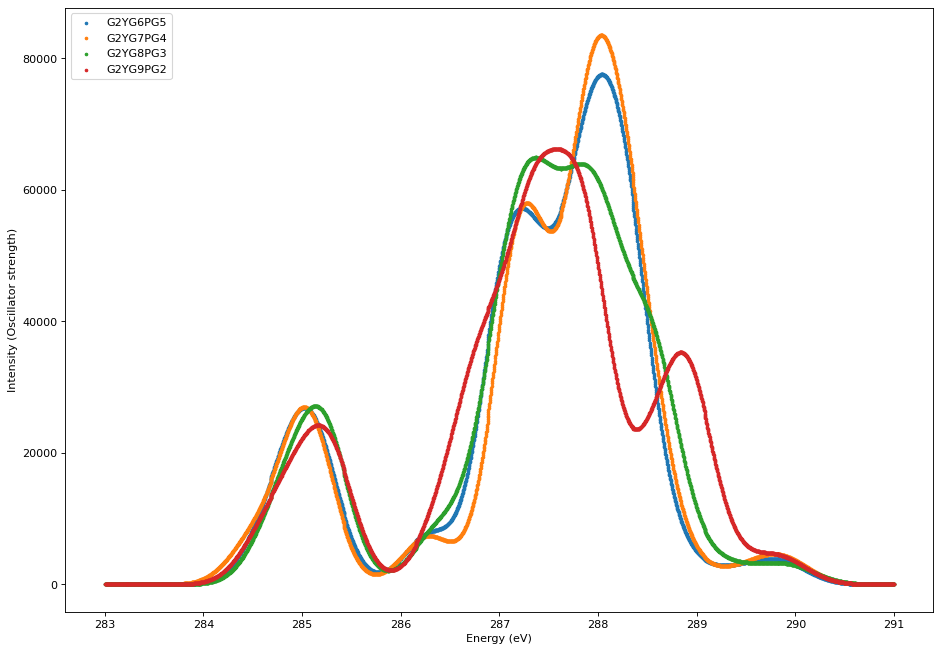

In [42]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
#n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

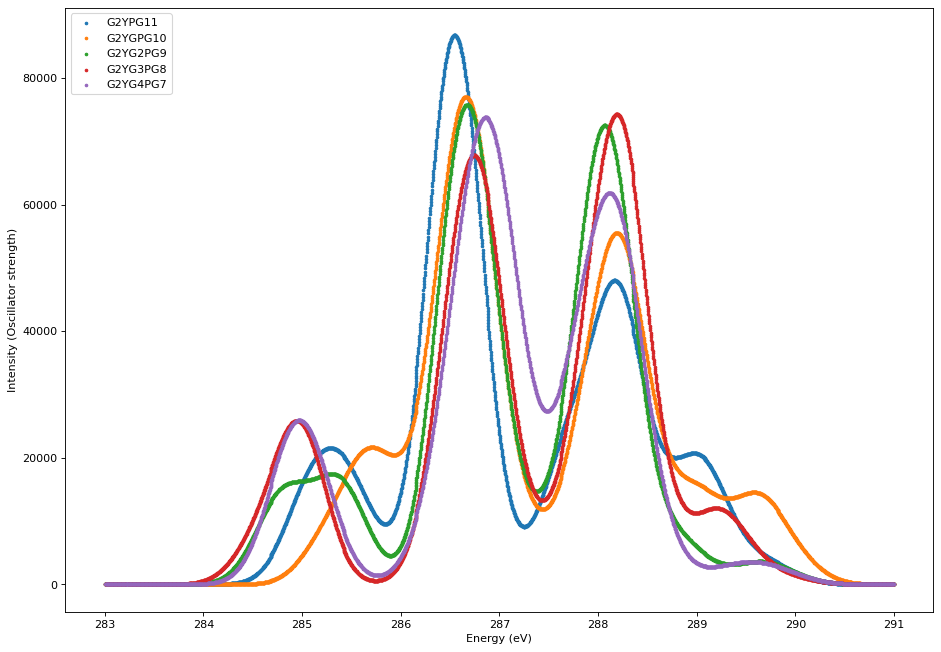

In [45]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
#n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

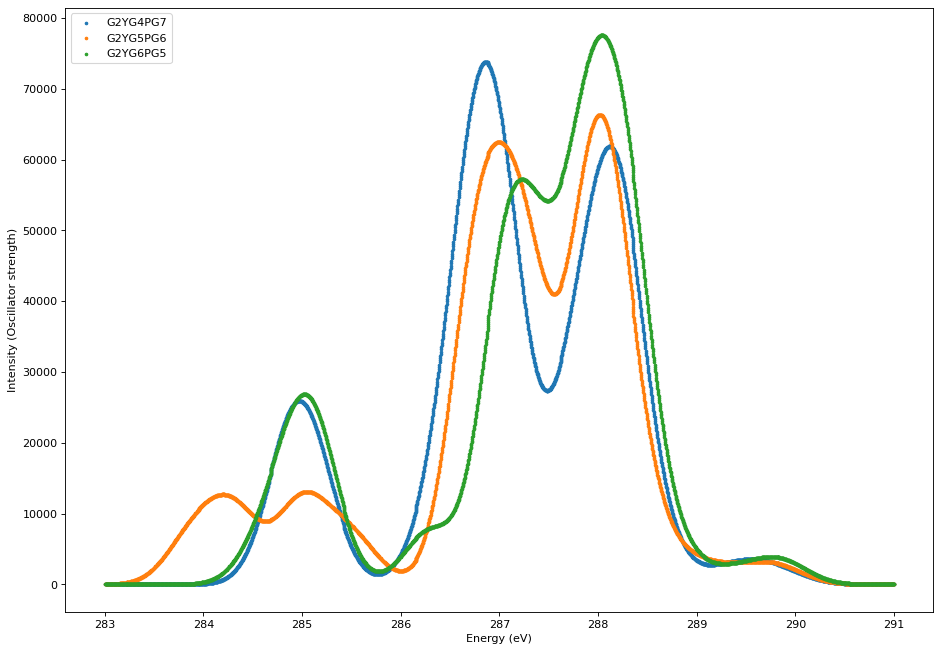

In [48]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

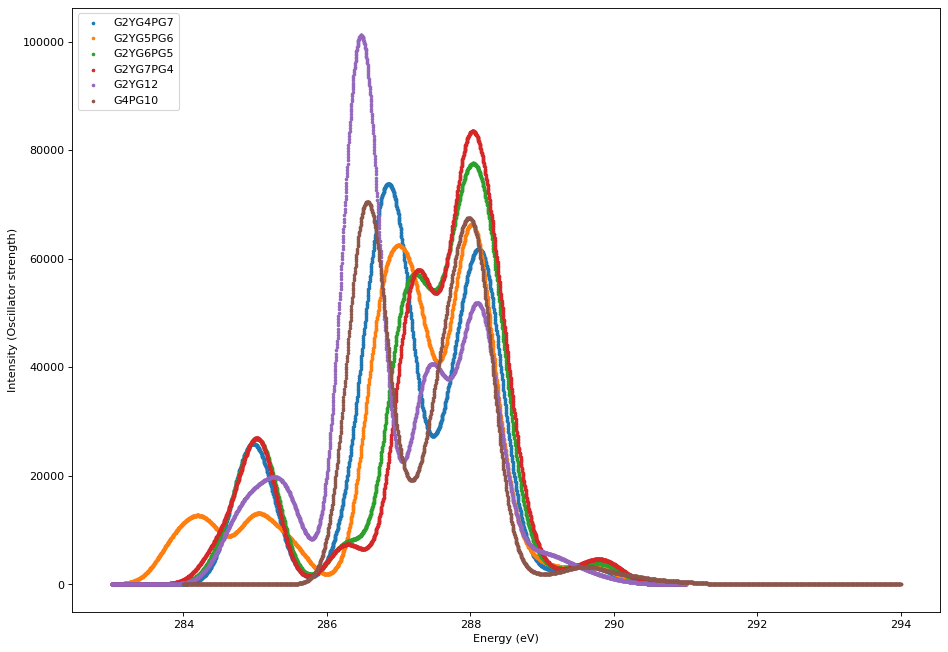

In [17]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']]-0.05,g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']]-0.13,g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']]-0.21,g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']]-0.4,g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']]-0.25,g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
n2.scatter(g2yg12[['Energy']],g2yg12[['Intensity']], s=5, label='G2YG12')
n2.scatter(g4pg10[['Energy']],g4pg10[['Intensity']], s=5, label='G4PG10')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()